# Plotly Evolution collection

In [22]:
import pandas as pd
import plotly.express as px

In [23]:
df = pd.read_csv('/Users/carboni/Downloads/MAH Art.csv')

In [24]:
df.head()

,ID œuvre,No Inventaire,Domaine,Catégorie,Dénominations,ID artiste MuseumPlusMAH,Auteur/Intervenant,Titre,Autre titre,Réf. Géo. Lieu représenté,réf. Géo. Lieu de création,Datation,création de,création à,Matière/technique,Mention obligatoire,Type d'acquisition,DateAcqu
0,11,E 77-0056-003,CdAG: Estampes/Multiple,Estampes,NaN,1685,"Editions Media, éditeur, ID: 1685",Square grid-complexities,NaN,NaN,NaN,1975,1975.0,NaN,Sérigraphie en couleur sur carton blanc,"MAH Musée d’art et d’histoire, Ville de Genève",Achat,1977-01-01
1,11,E 77-0056-003,CdAG: Estampes/Multiple,Estampes,NaN,57920,"Herman de Vries (Altmaar/Hollande, 1931), aute...",Square grid-complexities,NaN,NaN,NaN,1975,1975.0,NaN,Sérigraphie en couleur sur carton blanc,"MAH Musée d’art et d’histoire, Ville de Genève",Achat,1977-01-01
2,27,E 96-0289,CdAG: Estampes/Multiple,Estampes,NaN,86897,"Reynold Oscar Disteli (Berne, 04.12.1893 — Ver...","Saint-Pierre, Malines",NaN,Malines,NaN,1ère moitié 20e s.,1901.0,1950.0,Eau-forte sur vélin,Cabinet d'arts graphiques des Musées d'art et ...,Don,1995-01-01
3,31,E 93-0291,CdAG: Estampes/Multiple,Estampes,NaN,63459,"Amédée de Noé dit Cham (Paris, 26.01.1818 — Pa...",Peti...tefleue...deschamps/ Toujoue...toujoue....,NaN,NaN,NaN,milieu 19e s.,1837.0,1861.0,Lithographie,"MAH Musée d'art et d'histoire, Ville de Genève...",Don,1993-01-01
4,44,E 86-262-13,CdAG: Estampes/Multiple,Estampes,NaN,46607,"Pierre Tal Coat (Clohars-Carnoët/Finistère, 12...","ELEMENTS DE NATURE - Lithographies originales,...",NaN,NaN,Aix-en-Provence,1949,1949.0,NaN,Lithographie sur vélin d'Arches,"MAH Musée d'art et d'histoire, Ville de Genève...",Achat,1986-01-01


In [26]:
df = df.dropna(subset=['DateAcqu'])

In [27]:
df['Year'] = pd.to_datetime(df['DateAcqu']).dt.year

## Line Plot - Acquisition per year

In [28]:
acquisitions_per_year = df['Year'].value_counts().sort_index()

In [29]:
acquisitions_per_year

1700     2
1728     1
1742     1
1746     5
1747     3
        ..
2015    28
2016     4
2018     5
2020     1
2021     1
Name: Year, Length: 203, dtype: int64

In [30]:
data_for_plot = pd.DataFrame({
    'Year': acquisitions_per_year.index,
    'Acquisitions': acquisitions_per_year.values
})

In [31]:
fig = px.line(data_for_plot, x='Year', y='Acquisitions', title='Acquisitions Per Year')

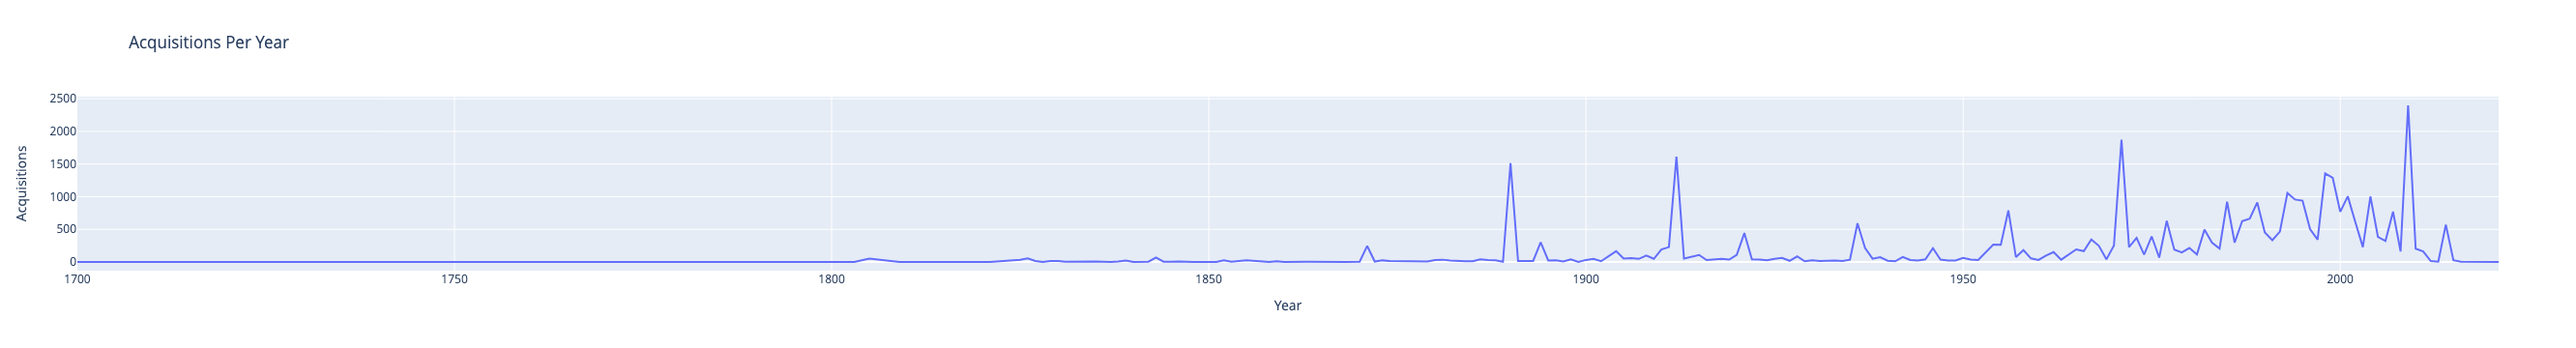

In [32]:
fig.show()

## Line Plot - Acquisition per year and Type

In [33]:
acquisitions_by_type = df.groupby(['Year', "Type d'acquisition"]).size().reset_index(name='Acquisitions')

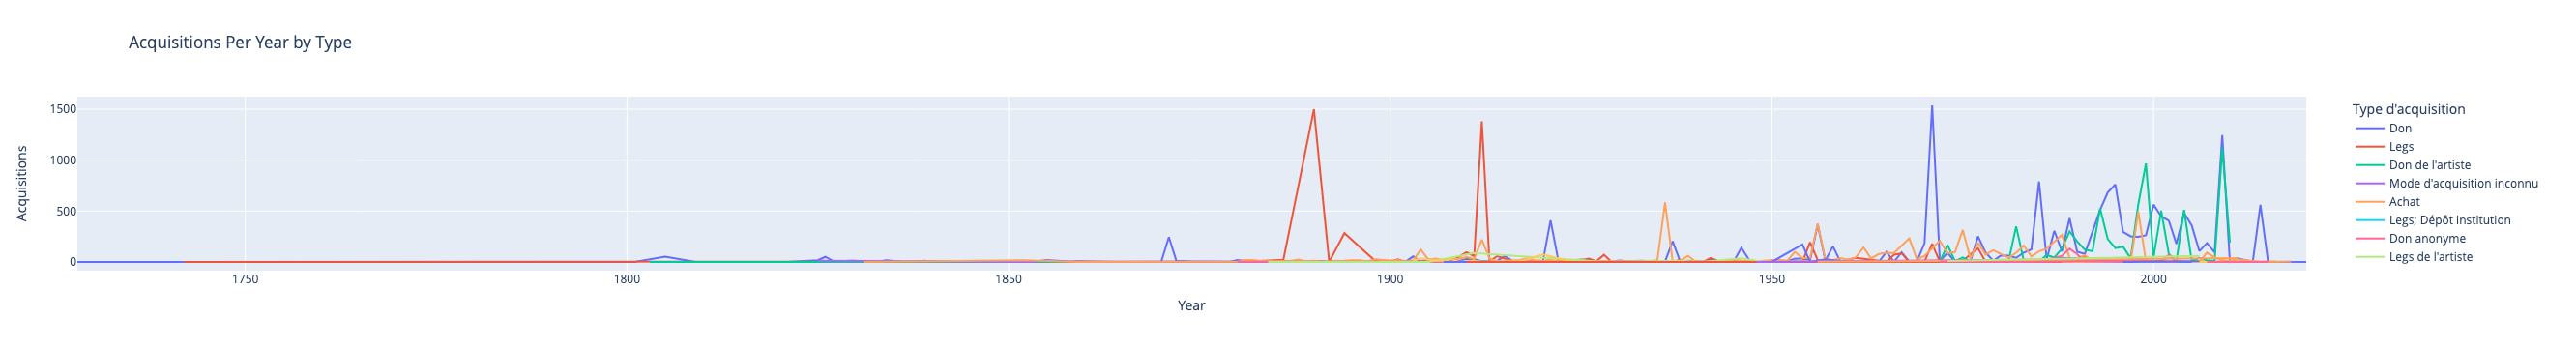

In [34]:
fig = px.line(acquisitions_by_type, x='Year', y='Acquisitions', color="Type d'acquisition", hover_name="Year",title='Acquisitions Per Year by Type')
fig.show()

In [35]:
fig.write_html("acquisitions_chart_by_type.html")

## Scatter Plot - Acquisition per year and Type

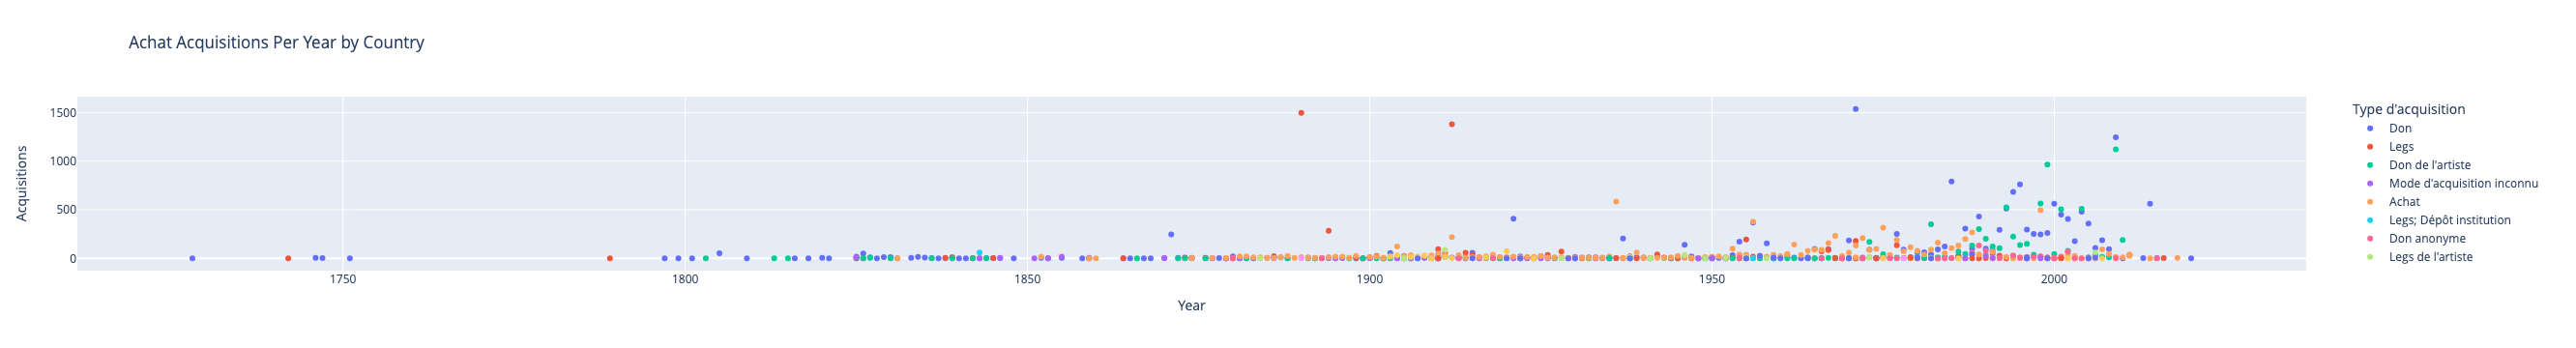

In [36]:
fig = px.scatter(acquisitions_by_type, x='Year', y='Acquisitions', color="Type d'acquisition", hover_name="Year", title='Achat Acquisitions Per Year by Country')
fig.show()

## Scatter Plot - Acquisition per year, Type and number of Artists

In [37]:
df_filtered = df[df['Year'] > 1900]

In [38]:
def concatenate_artists(series):
    return ', '.join(series.astype(str))

In [39]:
acquisitions_by_type_scatter = df.groupby(['Year', "Type d'acquisition"]).agg({'ID artiste MuseumPlusMAH': ['nunique', concatenate_artists]}).reset_index()

In [40]:
acquisitions_by_type_scatter.columns = ['Year', 'Type d\'acquisition', 'Unique Artists', 'Artist IDs']

In [41]:
fig = px.scatter(acquisitions_by_type_scatter, x='Year', y='Unique Artists', 
                 color="Type d'acquisition", size='Unique Artists', 
                 hover_data=['Artist IDs'], 
                 title='Acquisitions Per Year by Type (Unique Artist Count)')

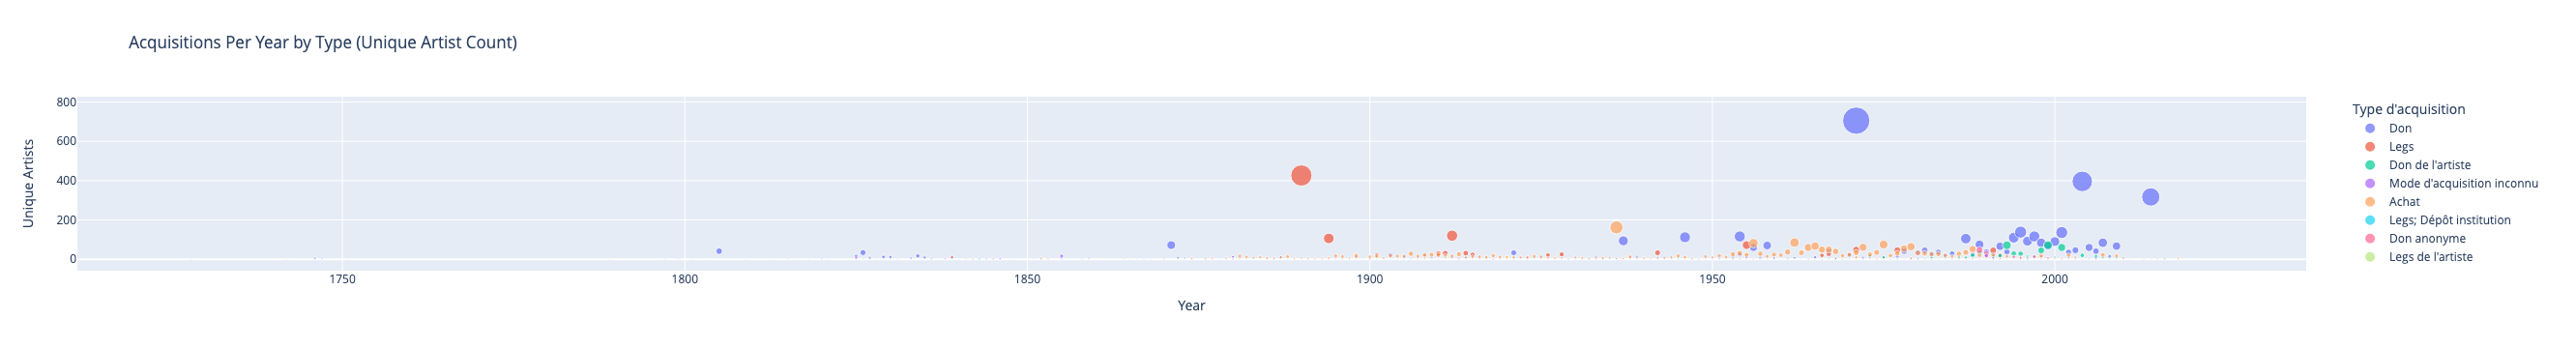

In [42]:
fig.show()
fig.write_html("acquisitions_scatter_by_type.html")

## Filter by content

In [ ]:
#df_achat = df[df["Type d'acquisition"] == "Achat"]

In [ ]:
#df_achat = df[df["Type d'acquisition"].str.contains("Achat", na=False)]

In [ ]:
#df_achat["Type d'acquisition"].unique()

In [ ]:
# acquisitions_by_country = df_achat.groupby(['Year', 'Country']).size().reset_index(name='Acquisitions')

In [ ]:
# fig = px.line(acquisitions_by_country, x='Year', y='Acquisitions', color='Country', hover_name="Year", title='Achat Acquisitions Per Year by Country')
# fig.show()